In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [7]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [8]:
# Compile the model with SGD optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with SGD optimizer
history_sgd = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with Adam optimizer
history_adam = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

# Compile the model with RMSprop optimizer
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with RMSprop optimizer
history_rmsprop = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/20
782/782 [==============================] - 171s 216ms/step - loss: 2.3460 - accuracy: 0.1706 - val_loss: 2.1421 - val_accuracy: 0.2911
Epoch 2/20
782/782 [==============================] - 166s 212ms/step - loss: 2.1353 - accuracy: 0.2709 - val_loss: 2.0131 - val_accuracy: 0.3435
Epoch 3/20
782/782 [==============================] - 167s 213ms/step - loss: 2.0200 - accuracy: 0.3194 - val_loss: 1.9061 - val_accuracy: 0.3800
Epoch 4/20
782/782 [==============================] - 178s 227ms/step - loss: 1.9053 - accuracy: 0.3599 - val_loss: 1.7871 - val_accuracy: 0.4057
Epoch 5/20
782/782 [==============================] - 182s 233ms/step - loss: 1.8075 - accuracy: 0.3911 - val_loss: 1.6710 - val_accuracy: 0.4472
Epoch 6/20
782/782 [==============================] - 174s 223ms/step - loss: 1.7304 - accuracy: 0.4177 - val_loss: 1.5857 - val_accuracy: 0.4696
Epoch 7/20
782/782 [==============================] - 169s 216ms/step - loss: 1.6696 - accuracy: 0.4410 - val_loss: 2.0203 -

In [9]:
import matplotlib.pyplot as plt

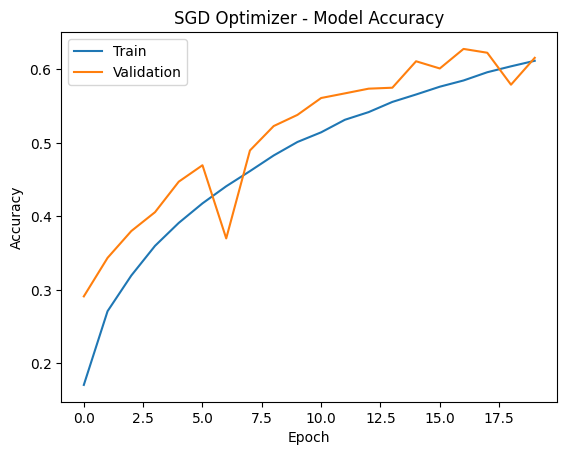

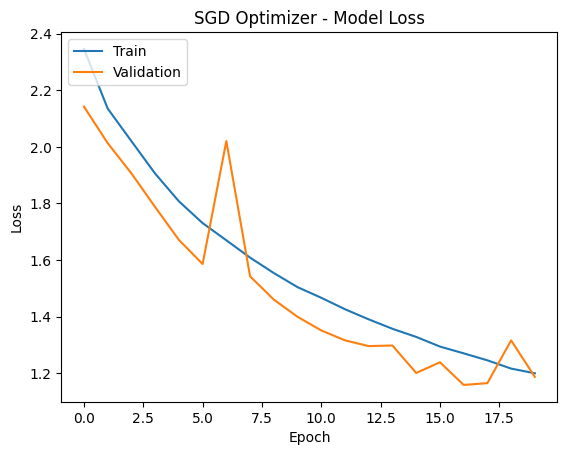

In [10]:
# Plot accuracy
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('SGD Optimizer - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('SGD Optimizer - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

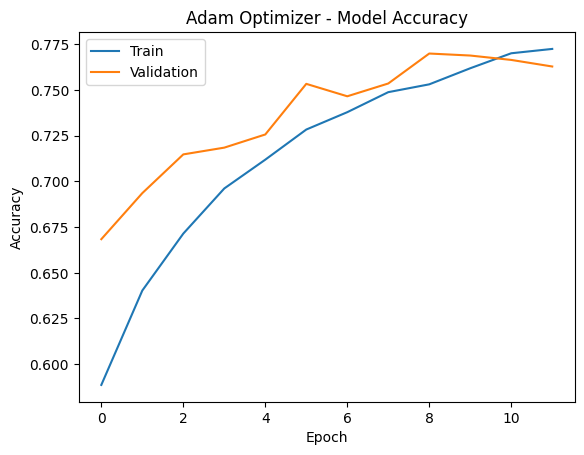

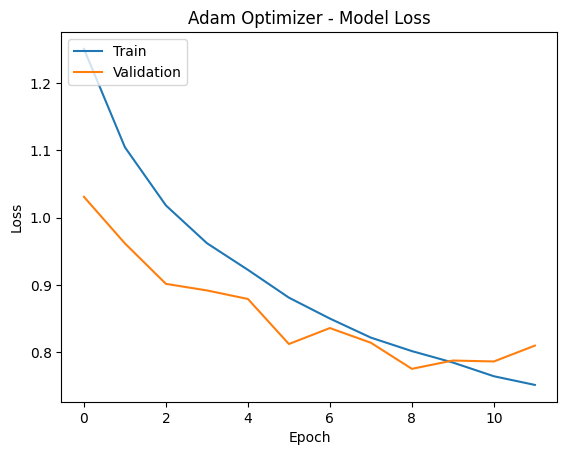

In [11]:
# Plot accuracy
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('Adam Optimizer - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Adam Optimizer - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

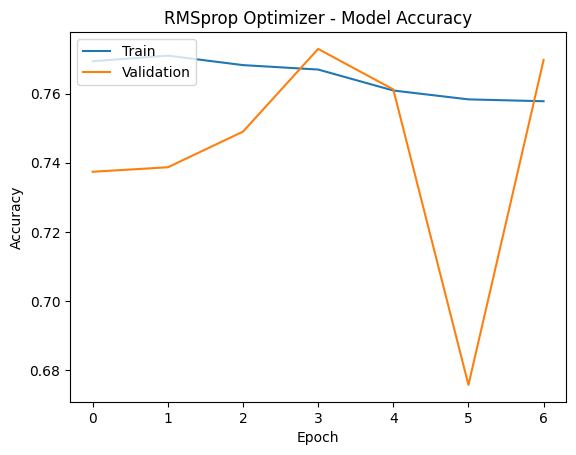

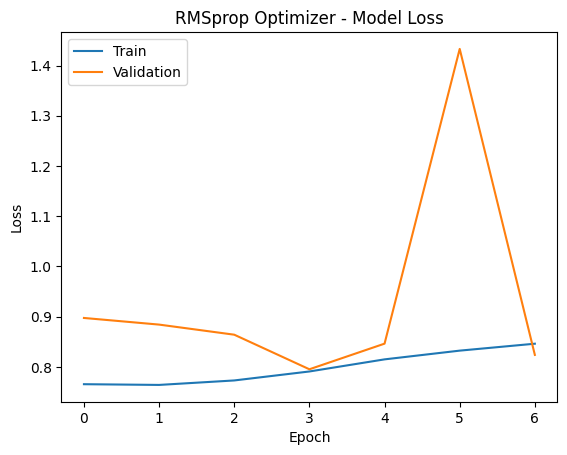

In [12]:
# Plot accuracy
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_rmsprop.history['val_accuracy'])
plt.title('RMSprop Optimizer - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('RMSprop Optimizer - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
from tensorflow.keras.regularizers import l1, l2

In [15]:
model_l1 = Sequential()
model_l1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l1(0.01)))
# Add the rest of the layers (MaxPooling, Conv2D, etc.)

In [16]:
model_l2 = Sequential()
model_l2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
# Add the rest of the layers (MaxPooling, Conv2D, etc.)

In [19]:
from tensorflow.keras.regularizers import l1

model_l1 = Sequential()
model_l1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l1(0.01)))
model_l1.add(MaxPooling2D(pool_size=(2, 2)))
model_l1.add(Dropout(0.25))
model_l1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l1(0.01)))
model_l1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l1(0.01)))
model_l1.add(MaxPooling2D(pool_size=(2, 2)))
model_l1.add(Dropout(0.25))
model_l1.add(Flatten())
model_l1.add(Dense(128, activation='relu'))
model_l1.add(Dropout(0.5))
model_l1.add(Dense(10, activation='softmax'))

# Compile the model with SGD optimizer
model_l1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_l1 = model_l1.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)


Epoch 1/20
782/782 [==============================] - 75s 92ms/step - loss: 9.4619 - accuracy: 0.1117 - val_loss: 2.4597 - val_accuracy: 0.1000
Epoch 2/20
782/782 [==============================] - 122s 156ms/step - loss: 2.3564 - accuracy: 0.0982 - val_loss: 2.3308 - val_accuracy: 0.1000
Epoch 3/20
782/782 [==============================] - 117s 149ms/step - loss: 2.3308 - accuracy: 0.0972 - val_loss: 2.3308 - val_accuracy: 0.1000
Epoch 4/20
782/782 [==============================] - 125s 160ms/step - loss: 2.3308 - accuracy: 0.0981 - val_loss: 2.3308 - val_accuracy: 0.1000
Epoch 5/20
782/782 [==============================] - 135s 173ms/step - loss: 2.3308 - accuracy: 0.0969 - val_loss: 2.3308 - val_accuracy: 0.1000
Epoch 6/20
782/782 [==============================] - 134s 171ms/step - loss: 2.3308 - accuracy: 0.0972 - val_loss: 2.3308 - val_accuracy: 0.1000
Epoch 7/20
782/782 [==============================] - 160s 204ms/step - loss: 2.3308 - accuracy: 0.0955 - val_loss: 2.3308 - v

In [20]:
from tensorflow.keras.regularizers import l2

model_l2 = Sequential()
model_l2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model_l2.add(MaxPooling2D(pool_size=(2, 2)))
model_l2.add(Dropout(0.25))
model_l2.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model_l2.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model_l2.add(MaxPooling2D(pool_size=(2, 2)))
model_l2.add(Dropout(0.25))
model_l2.add(Flatten())
model_l2.add(Dense(128, activation='relu'))
model_l2.add(Dropout(0.5))
model_l2.add(Dense(10, activation='softmax'))

# Compile the model with SGD optimizer
model_l2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_l2 = model_l2.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/20
782/782 [==============================] - 104s 131ms/step - loss: 3.1977 - accuracy: 0.1584 - val_loss: 2.8987 - val_accuracy: 0.2472
Epoch 2/20
782/782 [==============================] - 94s 120ms/step - loss: 2.7606 - accuracy: 0.2428 - val_loss: 2.5925 - val_accuracy: 0.2907
Epoch 3/20
782/782 [==============================] - 95s 121ms/step - loss: 2.4909 - accuracy: 0.2904 - val_loss: 2.9486 - val_accuracy: 0.1923
Epoch 4/20
782/782 [==============================] - 95s 121ms/step - loss: 2.2520 - accuracy: 0.3330 - val_loss: 2.0978 - val_accuracy: 0.3637
Epoch 5/20
782/782 [==============================] - 96s 123ms/step - loss: 2.0729 - accuracy: 0.3682 - val_loss: 1.9020 - val_accuracy: 0.4231
Epoch 6/20
782/782 [==============================] - 95s 122ms/step - loss: 1.9536 - accuracy: 0.3889 - val_loss: 1.9529 - val_accuracy: 0.3908
Epoch 7/20
782/782 [==============================] - 100s 128ms/step - loss: 1.8731 - accuracy: 0.4008 - val_loss: 1.7479 - val_

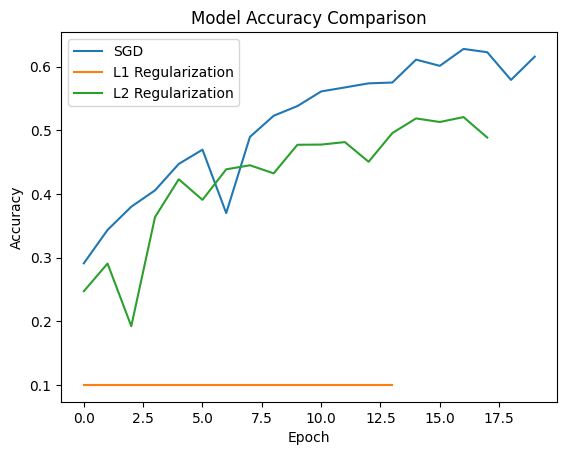

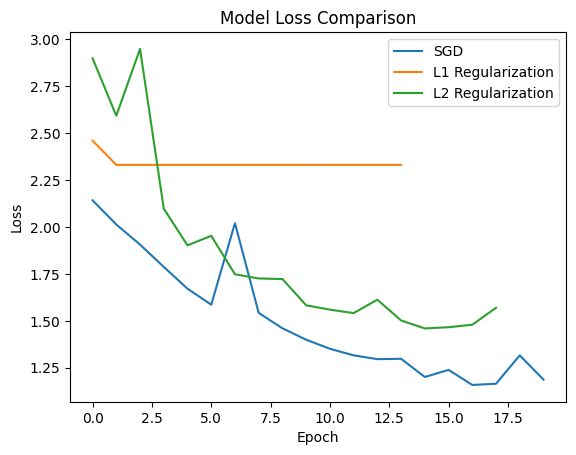

In [21]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.plot(history_l1.history['val_accuracy'], label='L1 Regularization')
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_sgd.history['val_loss'], label='SGD')
plt.plot(history_l1.history['val_loss'], label='L1 Regularization')
plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Load CIFAR-10 dataset without preprocessing
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = cifar10.load_data()

# Convert labels to one-hot encoding
y_train_raw = tf.keras.utils.to_categorical(y_train_raw, num_classes=10)
y_test_raw = tf.keras.utils.to_categorical(y_test_raw, num_classes=10)

# Define the model architecture
model_raw = Sequential()
model_raw.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_raw.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model_raw.add(MaxPooling2D(pool_size=(2, 2)))
model_raw.add(Dropout(0.25))
model_raw.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model_raw.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model_raw.add(MaxPooling2D(pool_size=(2, 2)))
model_raw.add(Dropout(0.25))
model_raw.add(Flatten())
model_raw.add(Dense(128, activation='relu'))
model_raw.add(Dropout(0.5))
model_raw.add(Dense(10, activation='softmax'))

# Compile the model with SGD optimizer
model_raw.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_raw = model_raw.fit(x_train_raw, y_train_raw, batch_size=64, epochs=20, validation_data=(x_test_raw, y_test_raw), callbacks=[early_stopping], verbose=1)

Epoch 1/20
782/782 [==============================] - 162s 206ms/step - loss: 7.9767 - accuracy: 0.0990 - val_loss: 6.3960 - val_accuracy: 0.1003
Epoch 2/20
782/782 [==============================] - 163s 208ms/step - loss: 6.3323 - accuracy: 0.1000 - val_loss: 6.2697 - val_accuracy: 0.1022
Epoch 3/20
782/782 [==============================] - 164s 210ms/step - loss: 6.2076 - accuracy: 0.1017 - val_loss: 6.1471 - val_accuracy: 0.1042
Epoch 4/20
782/782 [==============================] - 177s 226ms/step - loss: 6.0856 - accuracy: 0.1066 - val_loss: 6.0259 - val_accuracy: 0.1079
Epoch 5/20
782/782 [==============================] - 162s 208ms/step - loss: 5.9676 - accuracy: 0.1102 - val_loss: 5.9074 - val_accuracy: 0.1109
Epoch 6/20
782/782 [==============================] - 163s 209ms/step - loss: 5.8395 - accuracy: 0.1180 - val_loss: 5.7607 - val_accuracy: 0.1669
Epoch 7/20
782/782 [==============================] - 164s 210ms/step - loss: 5.5525 - accuracy: 0.2168 - val_loss: 5.2734 -

In [ ]:
# Plot accuracy
plt.plot(history_raw.history['val_accuracy'], label='Without Preprocessing')
plt.plot(history_sgd.history['val_accuracy'], label='With Preprocessing')
plt.title('Model Accuracy Comparison (with/without Preprocessing)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_raw.history['val_loss'], label='Without Preprocessing')
plt.plot(history_sgd.history['val_loss'], label='With Preprocessing')
plt.title('Model Loss Comparison (with/without Preprocessing)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()